In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('data_for_grouping.xlsx')
df.drop(columns = {'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'}, inplace = True)
df

,gara_id,application_name,author_id,builder_id,contractor_id,designer_id,engine_id,manager_id,status,decision_date,...,Коэффициент финансовой независимости,Коэффициент долг на капитал,Коэффициент покрытия процентов,Покрытие долга,Target,life_cycle,today,real_life_cycle,percent_of_life_cycle,Коэффициент долговой нагрузки
0,729352,Заявка на гарантирование - 335,5.400012e+08,960340000376,9.603400e+11,0.000000e+00,2.210400e+11,1.904400e+11,NaN,NaT,...,0.859191,0.060174,5.733126,3.488284,0,395,2024-11-01,729,1.845570,1.0
1,845821,Заявка на гарантирование - 407,8.034001e+10,60340004172,6.034000e+10,0.000000e+00,1.304400e+11,2.109400e+11,NaN,NaT,...,0.143591,0.929396,20.794199,0.550207,0,274,2024-11-01,508,1.854015,1.0
2,781580,Заявка на гарантирование - 379,5.114001e+10,981040003722,9.810400e+11,0.000000e+00,7.054001e+10,2.109400e+11,NaN,NaT,...,0.307868,0.020449,1331.828571,5.548625,0,426,2024-11-01,742,1.741784,1.0
3,187,NaN,NaN,30840000638,NaN,NaN,1.208400e+11,2.104400e+11,Действующий,2022-06-28,...,0.206400,1.292031,inf,0.031813,0,638,2024-11-01,1073,1.681818,1.0
4,144,NaN,NaN,80740001641,NaN,NaN,NaN,NaN,Действующий,2022-08-23,...,0.069650,NaN,inf,NaN,0,306,2024-11-01,918,3.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,91,NaN,1.054000e+10,110540015593,9.706400e+11,NaN,1.304400e+11,1.703400e+11,Завершенный,2020-02-14,...,0.084153,0.138312,inf,7.945981,1,453,2024-11-01,1813,4.002208,1.0
201,84,NaN,NaN,50440002386,5.044000e+10,NaN,3.114000e+10,1.706400e+11,Завершенный,2021-06-28,...,0.447128,0.024880,inf,1.897679,0,376,2024-11-01,1363,3.625000,1.0
202,111,NaN,6.074000e+10,60740002715,6.074000e+10,NaN,5.054001e+10,2.102400e+11,Завершенный,2021-04-27,...,0.191661,NaN,inf,NaN,0,250,2024-11-01,1337,5.348000,1.0
203,2,NaN,3.114000e+10,111140016064,2.064000e+10,NaN,1.402400e+11,2.106400e+11,Завершенный,2022-02-24,...,0.795254,0.000000,1.039538,inf,0,141,2024-11-01,1082,7.673759,1.0


In [4]:
# Unfin_cost and Season of every year

def get_season(date):
    month = date.month if pd.notnull(date) else None
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return None

df['season'] = df['dpg_date'].apply(get_season)
df['unfin_coff'] = df['unfin_cost']/df['cost_plan']

In [5]:
from datetime import datetime

# Inflaction of every year 8%
annual_inflation_rate = 0.08
inflation_reference_date = datetime(2024, 11, 1)


df['dpg_date'] = pd.to_datetime(df['dpg_date'], errors='coerce')

financial_columns = [
    'cost_plan', 'flat_msprice', 'build_mscost', 'flat_mscost', 'com_msprice', 'park_price',
    'self_cost', 'unfin_cost', 'share_cost', 'warr_cost', 'comm_cost', 'cost_official',
    'Итого краткосрочные активы', 'Итого краткосрочных обязательств', 'Денежные средства',
    'Краткосрочная дебиторская задолженность', 'Запасы', 'Себестоимость', 'Доход от реализации',   
    'Итого активы', 'Итого капитал', 'Итого пассивы', 'Краткосрочная кредиторская задолженность',
    'Операционная прибыль', 'Долгосрочные финансовые обязательства', 'Краткосрочные финансовые обязательства',
    'Итоговая прибыль (убыток)', 'Расходы на финансирование'
]

df['years_since_dpg'] = (inflation_reference_date - df['dpg_date']).dt.days / 365.25
df['inflation_factor'] = (1 + annual_inflation_rate) ** df['years_since_dpg']

for col in financial_columns:
    if col in df.columns:
        df[col] = df[col] * df['inflation_factor']

df.drop(columns=['years_since_dpg', 'inflation_factor'], inplace=True)


In [6]:
df.to_excel('full_data.xlsx')

In [7]:
df.columns

Index(['gara_id', 'application_name', 'author_id', 'builder_id',
       'contractor_id', 'designer_id', 'engine_id', 'manager_id', 'status',
       'decision_date', 'region_name', 'city_id', 'type', 'turn', 'network',
       'period_month', 'start_date', 'end_date', 'class', 'flat_area',
       'build_qty', 'build_floor', 'build_area', 'com_area', 'park_area',
       'flat_qty', 'com_qty', 'park_qty', 'flat_onerm', 'flat_tworm',
       'flat_threerm', 'flat_fourrm', 'cost_plan', 'flat_msprice',
       'build_mscost', 'flat_mscost', 'com_msprice', 'park_price', 'self_cost',
       'unfin_cost', 'share_cost', 'warr_cost', 'comm_cost', 'cost_official',
       'flat_inner', 'flat_height', 'dpg_date', 'dpg_num', 'dpg_add_num',
       'dpg_num_text', 'prolongation', 'update_date', 'state_id',
       'create_date', 'annul_date', 'state_name', 'дата фин данных', 'bin',
       'date', 'Итого краткосрочные активы',
       'Итого краткосрочных обязательств', 'Денежные средства',
       'Краткосро

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df = df[['period_month', 'city_id', 'com_qty', 'build_floor', 'unfin_cost', 'flat_threerm', 'build_area', 'flat_mscost', 'park_qty', 'com_area',
         'network', 'cost_official', 'builder_id', 'season', 'flat_onerm', 'flat_msprice', 'build_qty', 'com_msprice', 'flat_fourrm', 'park_area',
         'flat_tworm', 'park_price', 'flat_inner', 'flat_height', 'class', 'build_mscost', 'Коэффициент финансового левериджа', 'unfin_coff', 
         'Коэффициент абсолютной ликвидности', 'Коэффициент оборачиваемости активов', 'ROE', 'Коэффициент финансовой независимости', 
         'Краткосрочная дебиторская задолженность', 'Краткосрочная кредиторская задолженность', 'Коэффициент оборачиваемости запасов', 
         'Коэффициент быстрой ликвидности', 'Итого активы', 'Коэффициент чистой прибыли', 'Коэффициент оборачиваемости кредиторской задолженности', 
         'Долгосрочные финансовые обязательства', 'Доход от реализации', 'Коэффициент долг на капитал', 'ROA', 'Расходы на финансирование', 
         'Покрытие долга', 'Краткосрочные финансовые обязательства', 'Коэффициент текущей ликвидности', 'Target']]



df['coff_doxoda_ot_real'] = df['Доход от реализации'] / df['cost_official']

df.to_excel('doxod_ot_real.xlsx')


df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(axis=1, how='all')

non_numeric_cols = df.columns[(df.nunique() < 40) & (df.columns != 'Target') & (df.columns != 'city_id')]
df[non_numeric_cols] = df[non_numeric_cols].astype('object')

label_encoder = LabelEncoder()
for col in non_numeric_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

C:\Users\Norynbayev\AppData\Local\Temp\ipykernel_17008\2548601270.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['coff_doxoda_ot_real'] = df['Доход от реализации'] / df['cost_official']
C:\Users\Norynbayev\AppData\Local\Temp\ipykernel_17008\2548601270.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [9]:
non_numeric_cols

Index(['period_month', 'com_qty', 'build_floor', 'network', 'season',
       'build_qty', 'flat_fourrm', 'flat_inner', 'flat_height', 'class',
       'build_mscost'],
      dtype='object')

In [10]:
df

,period_month,city_id,com_qty,build_floor,unfin_cost,flat_threerm,build_area,flat_mscost,park_qty,com_area,...,Долгосрочные финансовые обязательства,Доход от реализации,Коэффициент долг на капитал,ROA,Расходы на финансирование,Покрытие долга,Краткосрочные финансовые обязательства,Коэффициент текущей ликвидности,Target,coff_doxoda_ot_real
0,4,18178,12,0,3.683644e+07,32.0,9633.70,256938.605624,NaN,7631.20,...,2.564579e+07,7.012104e+07,0.060174,0.206501,2.059503e+07,3.488284,8.202912e+06,2.903249,0,0.028329
1,32,18277,12,17,3.243253e+08,24.0,11723.00,469194.904792,1635.0,6650.80,...,2.989639e+06,3.384857e+07,0.929396,0.069282,1.079763e+05,0.550207,1.091151e+06,1.090348,0,0.010571
2,5,18267,33,14,2.044318e+08,20.0,6698.30,268859.495725,NaN,4842.00,...,0.000000e+00,1.188065e+06,0.020449,0.026954,3.877408e+01,5.548625,9.306888e+03,1.423023,0,0.000874
3,15,18194,0,17,3.515301e+09,187.0,69740.89,312989.246564,160.0,0.00,...,6.920992e+06,1.088195e+06,1.292031,0.008484,0.000000e+00,0.031813,0.000000e+00,6.704902,0,0.000054
4,11,18274,0,13,2.459899e+08,32.0,12055.20,202145.565055,0.0,0.00,...,NaN,4.916538e+05,NaN,0.036453,0.000000e+00,NaN,0.000000e+00,1.154266,0,0.000237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,8,18178,5,1,5.101774e+07,32.0,19814.66,278273.688452,0.0,1731.75,...,1.262608e+05,1.495464e+05,0.138312,0.074763,0.000000e+00,7.945981,0.000000e+00,0.866668,1,0.000023
201,30,18264,0,17,1.223360e+08,0.0,6326.20,192458.700588,0.0,0.00,...,1.648151e+08,2.788015e+09,0.024880,0.021111,0.000000e+00,1.897679,0.000000e+00,1.283775,0,2.346800
202,13,-11,2,17,4.854700e+08,0.0,11439.20,257921.506617,0.0,363.00,...,NaN,1.519793e+06,NaN,0.006692,0.000000e+00,NaN,1.298862e+06,1.502116,0,0.000515
203,29,177396,0,14,8.114968e+08,25.0,12721.20,168290.548074,0.0,0.00,...,0.000000e+00,4.922731e+06,0.000000,0.050113,1.194919e+07,NaN,0.000000e+00,21.307559,0,0.002299


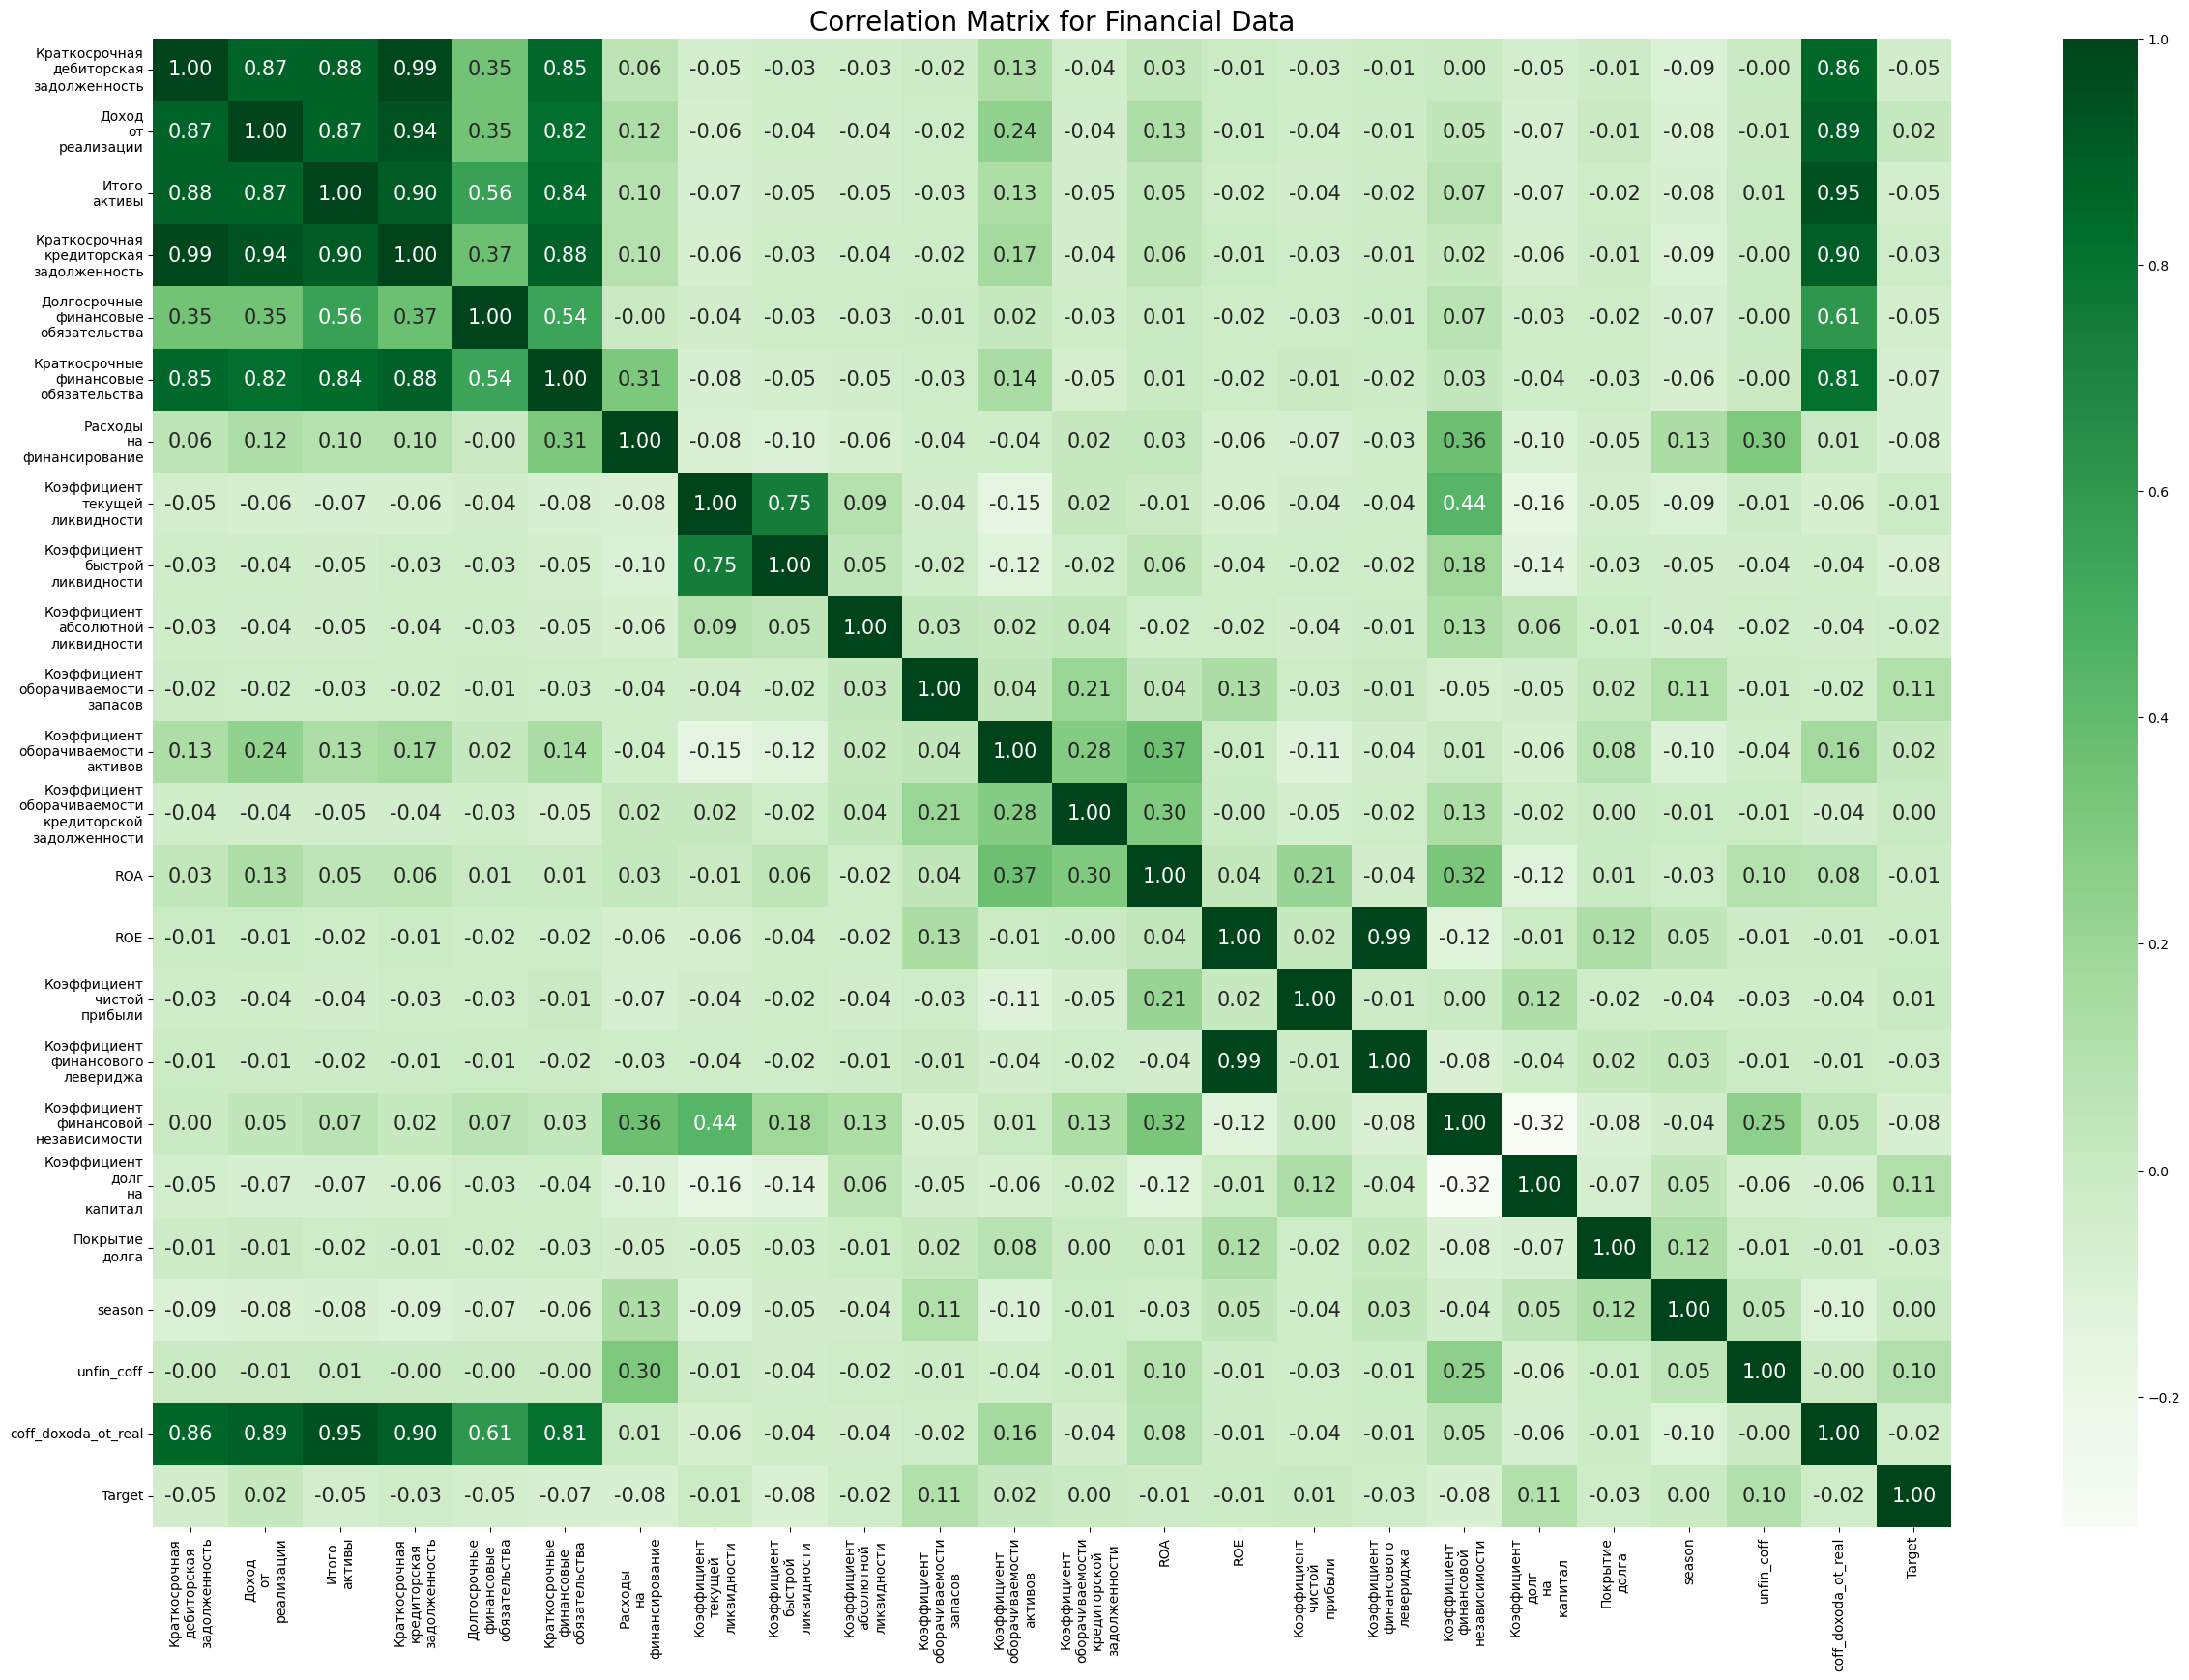

In [11]:
import  matplotlib.pyplot as plt 
import seaborn as sns


proj_col = df[['builder_id', 'city_id', 'network', 'period_month', 'class',
               'build_qty', 'build_floor', 'build_area', 'com_area',
               'park_area', 'com_qty', 'park_qty', 'flat_onerm',
               'flat_tworm', 'flat_threerm', 'flat_fourrm', 
               'flat_msprice', 'build_mscost', 'flat_mscost', 'com_msprice',
               'park_price', 'unfin_cost', 
                'cost_official', 'flat_inner', 'flat_height', 'Target']]

fin_col = df[['Краткосрочная дебиторская задолженность',
              'Доход от реализации', 'Итого активы',
              'Краткосрочная кредиторская задолженность', 
              'Долгосрочные финансовые обязательства',
              'Краткосрочные финансовые обязательства', 
              'Расходы на финансирование', 'Коэффициент текущей ликвидности',
              'Коэффициент быстрой ликвидности', 'Коэффициент абсолютной ликвидности',
              'Коэффициент оборачиваемости запасов',
              'Коэффициент оборачиваемости активов',
              'Коэффициент оборачиваемости кредиторской задолженности', 'ROA', 'ROE',
              'Коэффициент чистой прибыли', 'Коэффициент финансового левериджа',
              'Коэффициент финансовой независимости', 
              'Коэффициент долг на капитал', 
              'Покрытие долга', 'season', 'unfin_coff',
              'coff_doxoda_ot_real', 'Target']]

correlation_matrix = fin_col.corr()

wrapped_columns = [
    "\n".join(name.split(" ")) for name in correlation_matrix.columns
]

# Plotting the correlation matrix with annotations and rotated labels
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="Greens", 
    cbar=True, 
    xticklabels=wrapped_columns, 
    yticklabels=wrapped_columns,
    annot_kws={"fontsize": 15}  # Setting annotation font size
)

plt.title("Correlation Matrix for Financial Data", fontsize=20)
plt.xticks(rotation=90)  # Rotating x-axis labels
plt.yticks(rotation=0)  # Keeping y-axis labels horizontal
plt.show()

удалаем те параметры которые имеют корриляцию 90+ но при этом имеют плохой IV

In [12]:
df.columns

Index(['period_month', 'city_id', 'com_qty', 'build_floor', 'unfin_cost',
       'flat_threerm', 'build_area', 'flat_mscost', 'park_qty', 'com_area',
       'network', 'cost_official', 'builder_id', 'season', 'flat_onerm',
       'flat_msprice', 'build_qty', 'com_msprice', 'flat_fourrm', 'park_area',
       'flat_tworm', 'park_price', 'flat_inner', 'flat_height', 'class',
       'build_mscost', 'Коэффициент финансового левериджа', 'unfin_coff',
       'Коэффициент абсолютной ликвидности',
       'Коэффициент оборачиваемости активов', 'ROE',
       'Коэффициент финансовой независимости',
       'Краткосрочная дебиторская задолженность',
       'Краткосрочная кредиторская задолженность',
       'Коэффициент оборачиваемости запасов',
       'Коэффициент быстрой ликвидности', 'Итого активы',
       'Коэффициент чистой прибыли',
       'Коэффициент оборачиваемости кредиторской задолженности',
       'Долгосрочные финансовые обязательства', 'Доход от реализации',
       'Коэффициент долг на 

# Test


SVM Accuracy: 0.86
SVM Confusion Matrix:
[[62  0]
 [10  0]]

SVM ROC AUC: 0.54
SVM Kolmogorov-Smirnov (KS): 0.28
SVM Gini Coefficient: 0.09



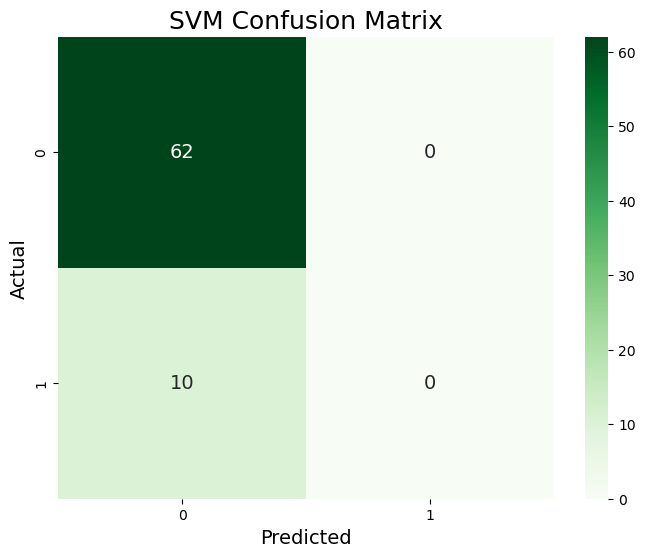

Logistic Regression (L2) Accuracy: 0.86
Logistic Regression (L2) Confusion Matrix:
[[62  0]
 [10  0]]

Logistic Regression (L2) ROC AUC: 0.67
Logistic Regression (L2) Kolmogorov-Smirnov (KS): 0.36
Logistic Regression (L2) Gini Coefficient: 0.35



C:\Users\Norynbayev\AppData\Local\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


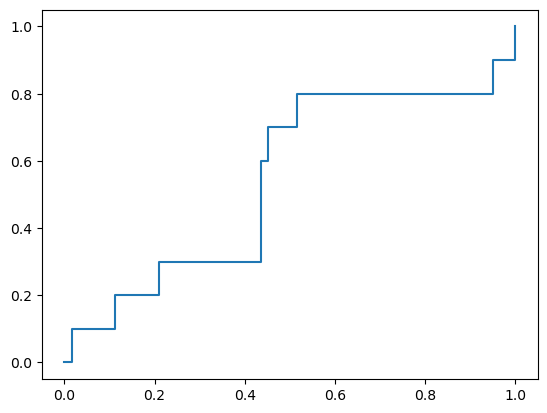

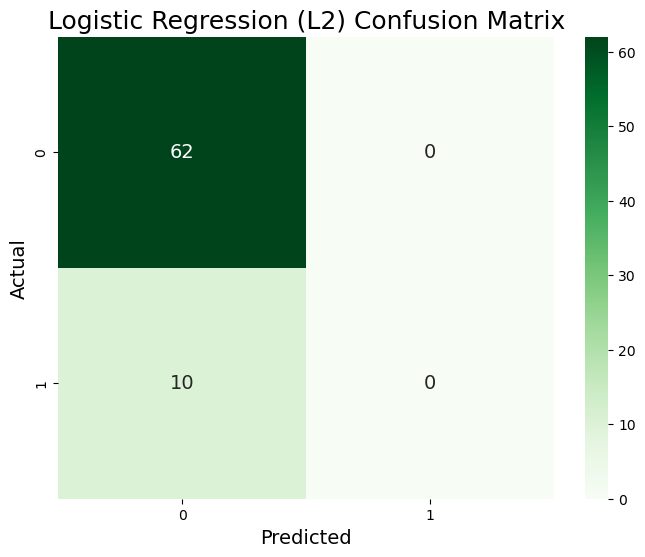

Logistic Regression (L1) Accuracy: 0.72
Logistic Regression (L1) Confusion Matrix:
[[48 14]
 [ 6  4]]

Logistic Regression (L1) ROC AUC: 0.60
Logistic Regression (L1) Kolmogorov-Smirnov (KS): 0.26
Logistic Regression (L1) Gini Coefficient: 0.20



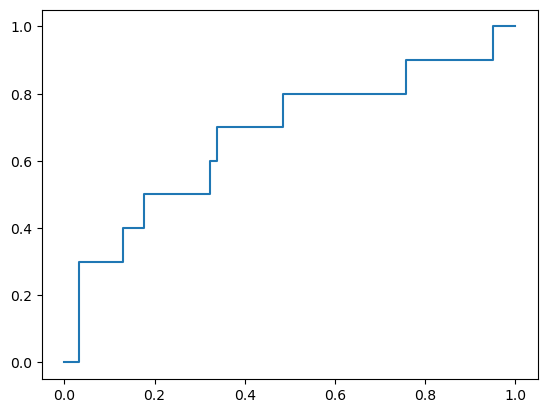

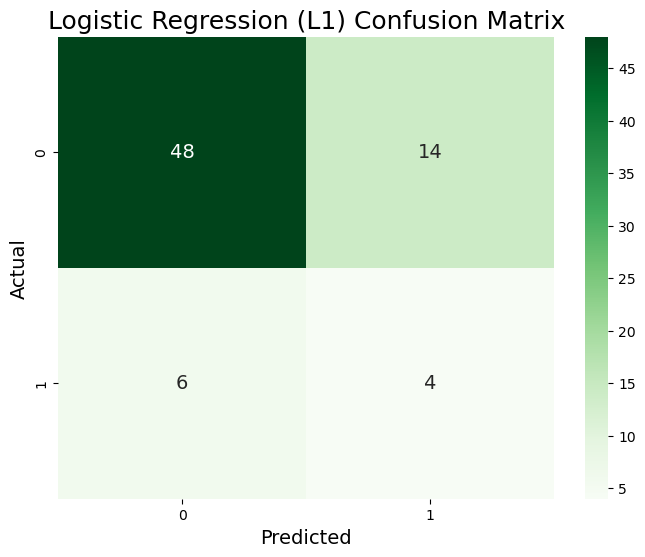

Random Forest Accuracy: 0.89
Random Forest Confusion Matrix:
[[61  1]
 [ 7  3]]

Random Forest ROC AUC: 0.75
Random Forest Kolmogorov-Smirnov (KS): 0.47
Random Forest Gini Coefficient: 0.50



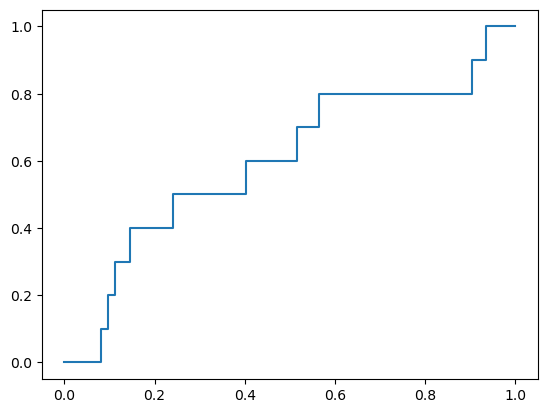

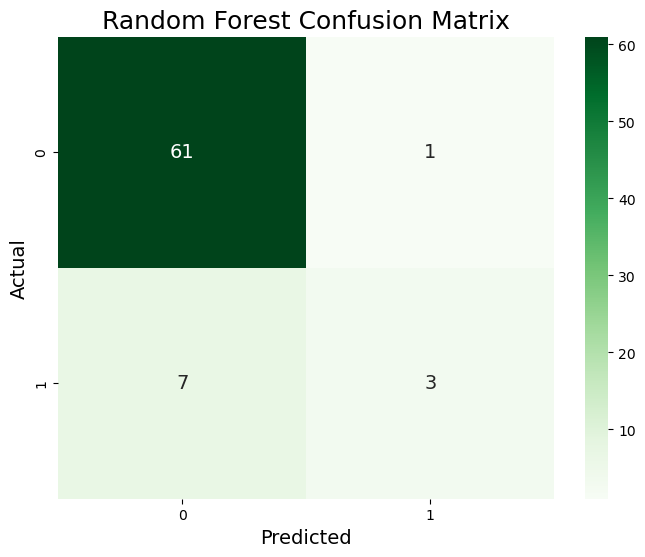

Gradient Boosting Accuracy: 0.85
Gradient Boosting Confusion Matrix:
[[58  4]
 [ 7  3]]

Gradient Boosting ROC AUC: 0.80
Gradient Boosting Kolmogorov-Smirnov (KS): 0.56
Gradient Boosting Gini Coefficient: 0.59



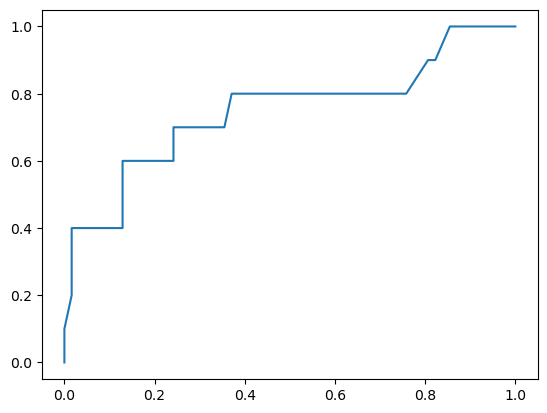

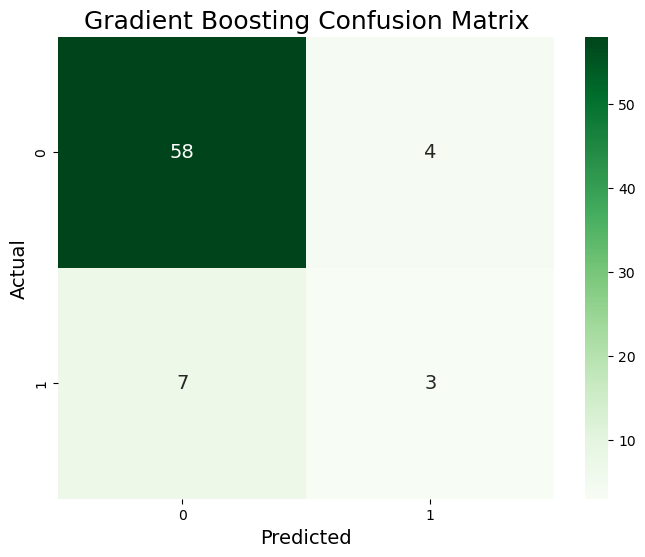

C:\Users\Norynbayev\AppData\Local\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.89
AdaBoost Confusion Matrix:
[[61  1]
 [ 7  3]]

AdaBoost ROC AUC: 0.55
AdaBoost Kolmogorov-Smirnov (KS): 0.30
AdaBoost Gini Coefficient: 0.10



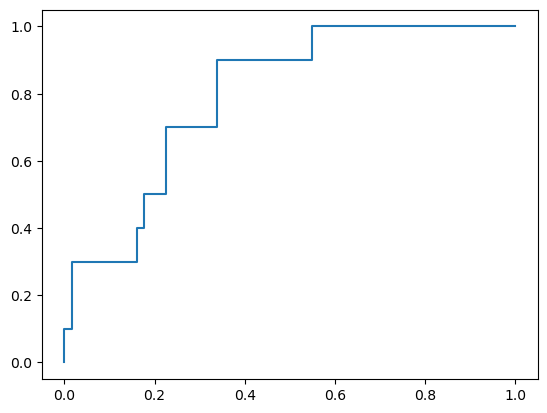

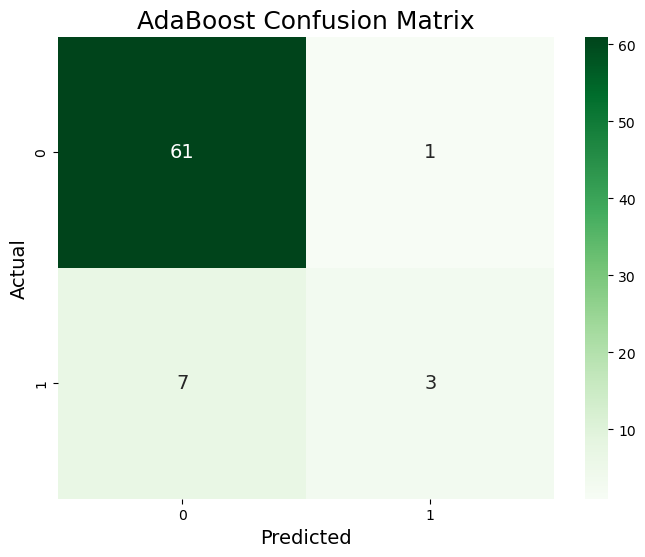

Bagging Accuracy: 0.90
Bagging Confusion Matrix:
[[61  1]
 [ 6  4]]

Bagging ROC AUC: 0.84
Bagging Kolmogorov-Smirnov (KS): 0.69
Bagging Gini Coefficient: 0.68



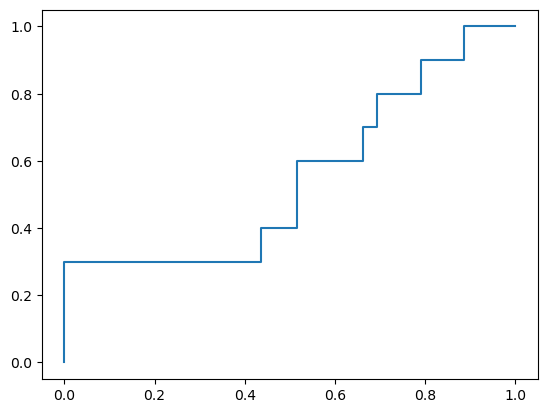

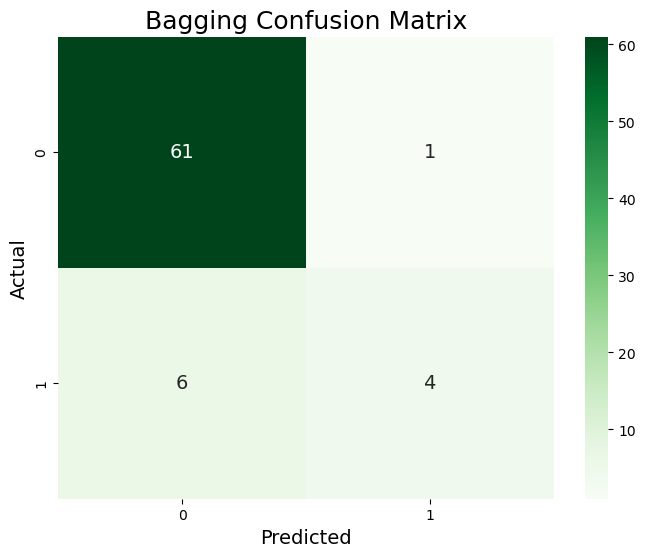

C:\Users\Norynbayev\AppData\Local\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:16:13] WARNING: D:\bld\xgboost-split_1732150467793\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.88
XGBoost Confusion Matrix:
[[60  2]
 [ 7  3]]

XGBoost ROC AUC: 0.82
XGBoost Kolmogorov-Smirnov (KS): 0.58
XGBoost Gini Coefficient: 0.65



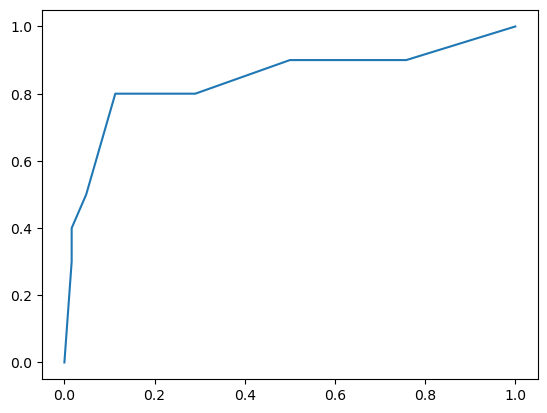

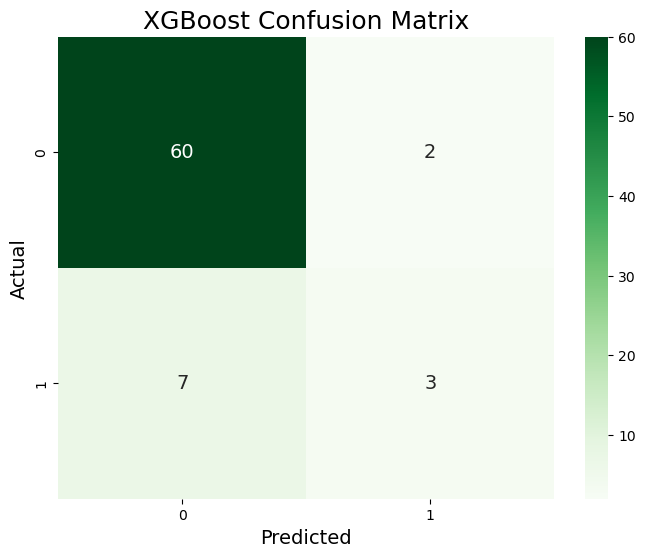

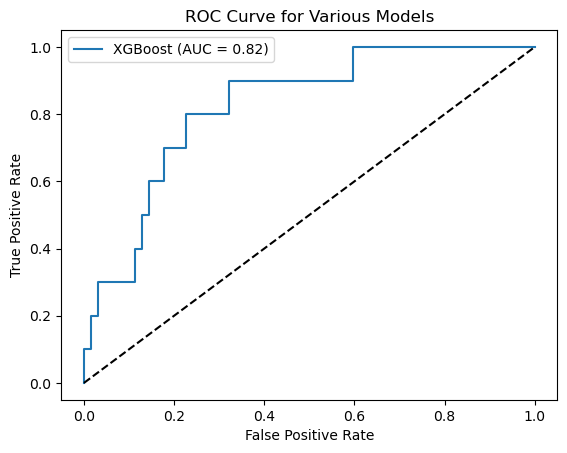

Feature Importances for AdaBoost and Random Forest:


,Random Forest,AdaBoost
period_month,0.024320,0.06
city_id,0.028654,0.04
com_qty,0.009843,0.00
build_floor,0.020449,0.02
unfin_cost,0.028748,0.00
flat_threerm,0.021797,0.00
build_area,0.025425,0.02
flat_mscost,0.029303,0.08
park_qty,0.010465,0.02
com_area,0.016932,0.02


Model Performance Metrics:


,Model,Accuracy,ROC AUC,KS Statistic,Gini Coefficient
0,SVM,0.861111,0.543548,0.283871,0.087097
1,Logistic Regression (L2),0.861111,0.674194,0.361290,0.348387
2,Logistic Regression (L1),0.722222,0.600000,0.258065,0.200000
3,Random Forest,0.888889,0.747581,0.470968,0.495161
4,Gradient Boosting,0.847222,0.795161,0.561290,0.590323
5,AdaBoost,0.888889,0.550000,0.300000,0.100000
6,Bagging,0.902778,0.841129,0.687097,0.682258
7,XGBoost,0.875000,0.824194,0.577419,0.648387


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)
from xgboost import XGBClassifier

# Splitting data into features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=436)

# Models dictionary
models = {
    "SVM": svm.SVC(probability=True),
    "Logistic Regression (L2)": LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000),
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Store feature importances and evaluation metrics
feature_importances = {}
metrics = []

# Loop through models
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions and probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    ks_stat = max(tpr - fpr)
    gini_coefficient = 2 * auc - 1
    cm = confusion_matrix(y_test, y_pred)
    
    # Print metrics
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"{name} Confusion Matrix:\n{cm}\n")
    print(f"{name} ROC AUC: {auc:.2f}")
    print(f"{name} Kolmogorov-Smirnov (KS): {ks_stat:.2f}")
    print(f"{name} Gini Coefficient: {gini_coefficient:.2f}\n")
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=True, annot_kws={"size": 14})
    plt.title(f"{name} Confusion Matrix", fontsize=18)
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.show()
    
    # Store metrics
    metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "ROC AUC": auc,
        "KS Statistic": ks_stat,
        "Gini Coefficient": gini_coefficient
    })
    
    # Extract feature importances if available
    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_
    
    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Plot aggregated ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Various Models')
plt.legend()
plt.show()

# Feature Importance DataFrame
if feature_importances:
    # Select only AdaBoost and Random Forest
    selected_models = ['Random Forest', 'AdaBoost']
    filtered_importances = {k: v for k, v in feature_importances.items() if k in selected_models}
    
    # Convert to DataFrame
    feature_importances_df = pd.DataFrame.from_dict(filtered_importances, orient='index', columns=X.columns)
    feature_importances_df = feature_importances_df.T
    
    print("Feature Importances for AdaBoost and Random Forest:")
    display(feature_importances_df)

if feature_importances:
    selected_models = ['Random Forest', 'AdaBoost']
    filtered_importances = {k: v for k, v in feature_importances.items() if k in selected_models}
    
    # Convert to DataFrame
    feature_importances_df = pd.DataFrame.from_dict(filtered_importances, orient='index', columns=X.columns).T
    feature_importances_df.to_excel("feature_importances.xlsx", index=True)

# Metrics DataFrame
metrics_df = pd.DataFrame(metrics)
print("Model Performance Metrics:")
display(metrics_df)

In [37]:
feature_importances_df.to_excel('weight_of_features.xlsx')

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Define the base estimator
# Create AdaBoost classifier object
abc = AdaBoostClassifier()

# Train AdaBoost Classifier
model = abc.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888


C:\Users\Norynbayev\AppData\Local\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix:
[[61  1]
 [ 7  3]]


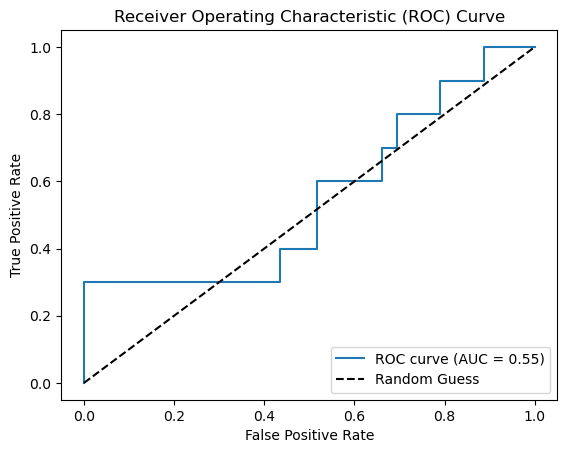

Accuracy: 0.89
ROC AUC Score: 0.55
Gini Coefficient: 0.10
Kolmogorov-Smirnov Statistic: 0.30


In [39]:
# Predict probabilities for ROC, Gini, and KS metrics
probabilities = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute metrics
roc_auc = roc_auc_score(y_test, probabilities)
gini_coefficient = 2 * roc_auc - 1

# Compute Kolmogorov-Smirnov (KS) statistic
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
ks_statistic = max(tpr - fpr)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Display metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Gini Coefficient: {gini_coefficient:.2f}")
print(f"Kolmogorov-Smirnov Statistic: {ks_statistic:.2f}")

In [40]:
X_test.to_excel('prediction.xlsx')

# ----------------------------------------------------------

In [41]:
----------------------------------------------------------

SyntaxError: invalid syntax (2545429118.py, line 1)

# Saving Pregiction

In [42]:
X_test = pd.read_excel('prediction.xlsx')

In [43]:
sprav = pd.read_excel('Справочник с data_for_grouping.xlsx')

X_test = X_test.merge(sprav[['cost_official', 'Название проекта', 'Название застройшика']],
                               left_on='cost_official', 
                               right_on='cost_official', 
                               how='left')


In [44]:
X_test['probabilities'] = probabilities

In [ ]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_test['Target'] = y_test

In [ ]:
X_test['Target'] = y_test

In [ ]:
y_test

In [ ]:
X_test['predicted'] = y_pred

In [ ]:
X_test

In [ ]:
X_test.to_excel('prediction_ADA.xlsx')

In [ ]:
wevfs

# StepwiseMethod

In [45]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_excel('data_for_grouping.xlsx')
df.drop(columns = {'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'}, inplace = True)

In [47]:
# Unfin_cost and Season of every year

def get_season(date):
    month = date.month if pd.notnull(date) else None
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return None

df['season'] = df['dpg_date'].apply(get_season)
df['unfin_coff'] = df['unfin_cost']/df['cost_plan']

In [48]:
from datetime import datetime

# Inflaction of every year 8%
annual_inflation_rate = 0.08
inflation_reference_date = datetime(2024, 11, 1)


df['dpg_date'] = pd.to_datetime(df['dpg_date'], errors='coerce')

financial_columns = [
    'cost_plan', 'flat_msprice', 'build_mscost', 'flat_mscost', 'com_msprice', 'park_price',
    'self_cost', 'unfin_cost', 'share_cost', 'warr_cost', 'comm_cost', 'cost_official',
    'Итого краткосрочные активы', 'Итого краткосрочных обязательств', 'Денежные средства',
    'Краткосрочная дебиторская задолженность', 'Запасы', 'Себестоимость', 'Доход от реализации',   
    'Итого активы', 'Итого капитал', 'Итого пассивы', 'Краткосрочная кредиторская задолженность',
    'Операционная прибыль', 'Долгосрочные финансовые обязательства', 'Краткосрочные финансовые обязательства',
    'Итоговая прибыль (убыток)', 'Расходы на финансирование'
]

df['years_since_dpg'] = (inflation_reference_date - df['dpg_date']).dt.days / 365.25
df['inflation_factor'] = (1 + annual_inflation_rate) ** df['years_since_dpg']

for col in financial_columns:
    if col in df.columns:
        df[col] = df[col] * df['inflation_factor']

df.drop(columns=['years_since_dpg', 'inflation_factor'], inplace=True)


In [49]:
import numpy as np

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculate 'Коэффициент маневренности' if required columns exist
if {'Краткосрочная дебиторская задолженность', 'Краткосрочная кредиторская задолженность', 'Итого капитал'}.issubset(df.columns):
    df['Коэффициент маневренности'] = (
        df['Краткосрочная дебиторская задолженность'] /
        df['Краткосрочная кредиторская задолженность']
    ) / df['Итого капитал']

# Check for column names before selecting them
required_columns = [
    'Target',  # Corrected name if 'Tagret' was a typo
    'Коэффициент чистой прибыли', 
    'ROA', 
    'ROE', 
    'Коэффициент текущей ликвидности', 
    'Коэффициент финансовой независимости',
    'Коэффициент маневренности', 
    'Коэффициент долг на капитал', 
]

# Filter for available columns
available_columns = [col for col in required_columns if col in df.columns]
df = df[available_columns]

# Drop columns with all NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(axis=1, how='all')

SVM Accuracy: 0.86
SVM Confusion Matrix:
[[62  0]
 [10  0]]

SVM ROC AUC: 0.55
SVM Kolmogorov-Smirnov (KS): 0.21
SVM Gini Coefficient: 0.10



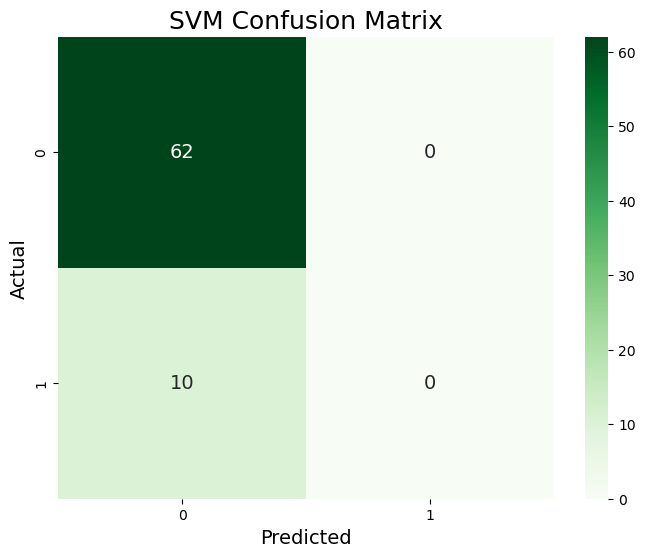

Logistic Regression (L2) Accuracy: 0.85
Logistic Regression (L2) Confusion Matrix:
[[61  1]
 [10  0]]

Logistic Regression (L2) ROC AUC: 0.57
Logistic Regression (L2) Kolmogorov-Smirnov (KS): 0.39
Logistic Regression (L2) Gini Coefficient: 0.13



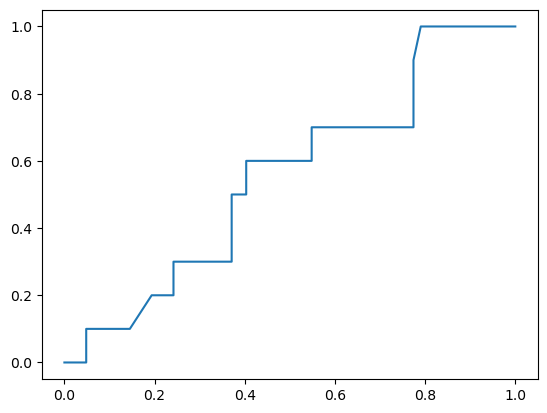

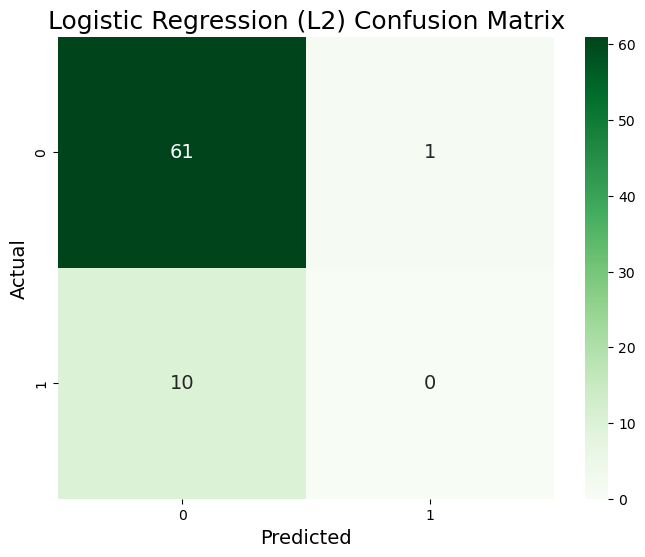

Logistic Regression (L1) Accuracy: 0.85
Logistic Regression (L1) Confusion Matrix:
[[61  1]
 [10  0]]

Logistic Regression (L1) ROC AUC: 0.58
Logistic Regression (L1) Kolmogorov-Smirnov (KS): 0.39
Logistic Regression (L1) Gini Coefficient: 0.16



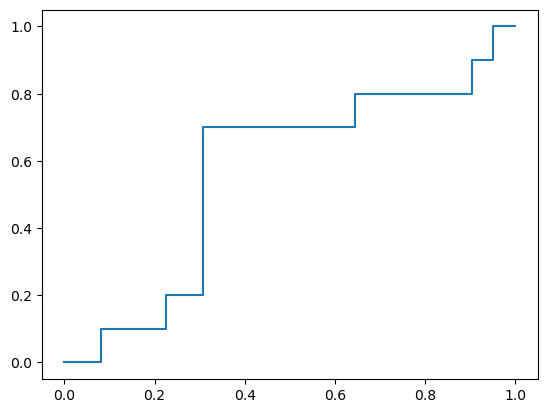

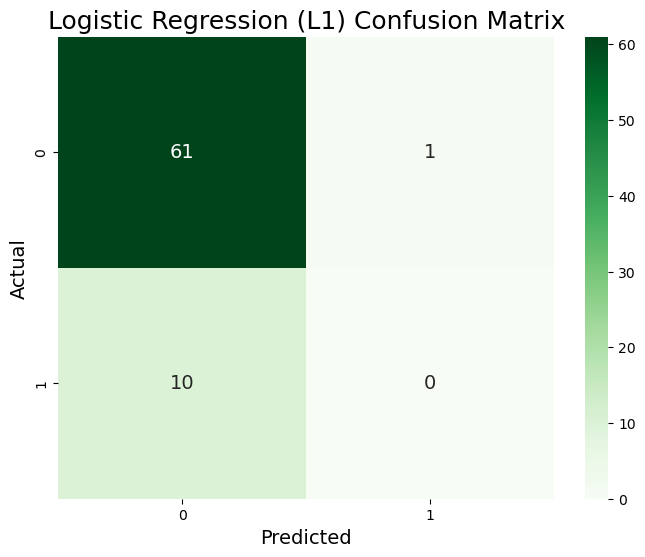

Random Forest Accuracy: 0.83
Random Forest Confusion Matrix:
[[56  6]
 [ 6  4]]

Random Forest ROC AUC: 0.70
Random Forest Kolmogorov-Smirnov (KS): 0.41
Random Forest Gini Coefficient: 0.40



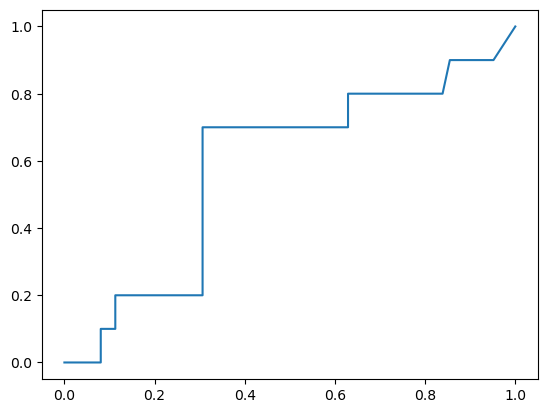

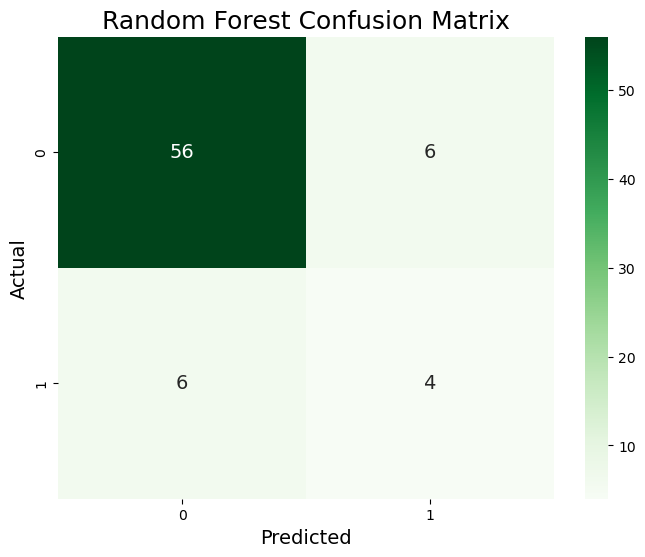

Gradient Boosting Accuracy: 0.82
Gradient Boosting Confusion Matrix:
[[56  6]
 [ 7  3]]

Gradient Boosting ROC AUC: 0.63
Gradient Boosting Kolmogorov-Smirnov (KS): 0.32
Gradient Boosting Gini Coefficient: 0.25



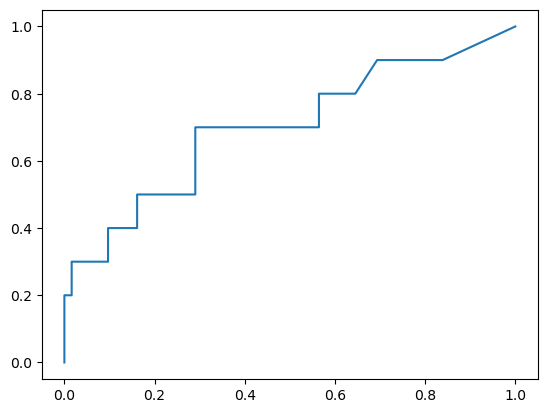

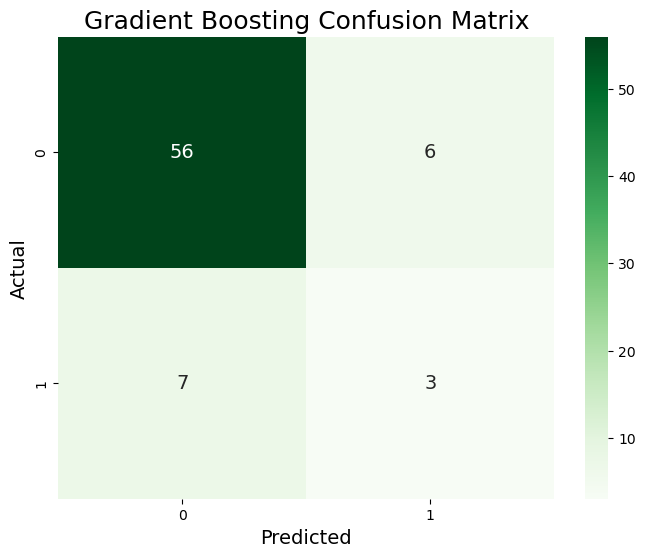

C:\Users\Norynbayev\AppData\Local\miniconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.81
AdaBoost Confusion Matrix:
[[56  6]
 [ 8  2]]

AdaBoost ROC AUC: 0.57
AdaBoost Kolmogorov-Smirnov (KS): 0.29
AdaBoost Gini Coefficient: 0.14



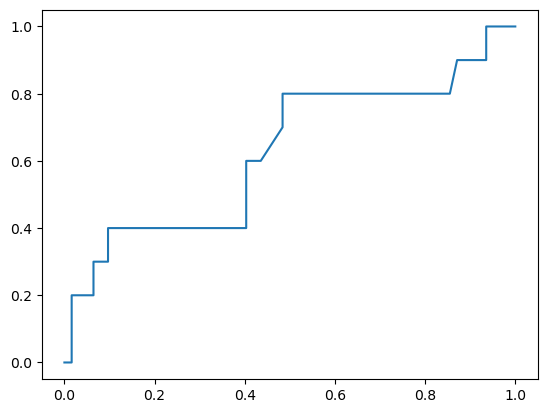

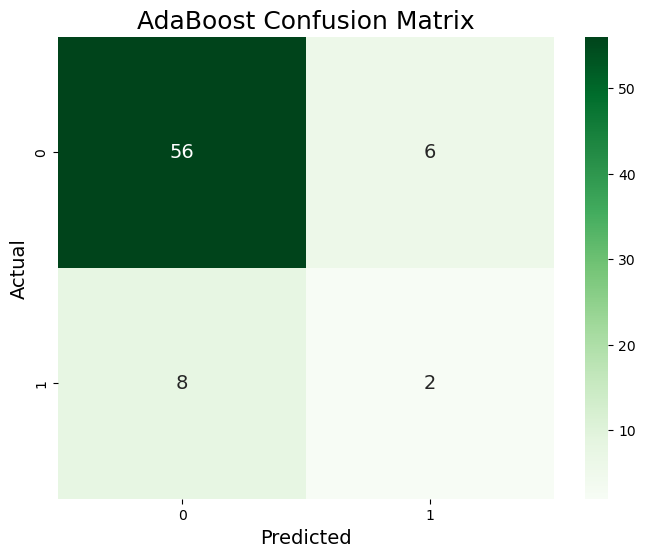

Bagging Accuracy: 0.78
Bagging Confusion Matrix:
[[51 11]
 [ 5  5]]

Bagging ROC AUC: 0.76
Bagging Kolmogorov-Smirnov (KS): 0.49
Bagging Gini Coefficient: 0.52



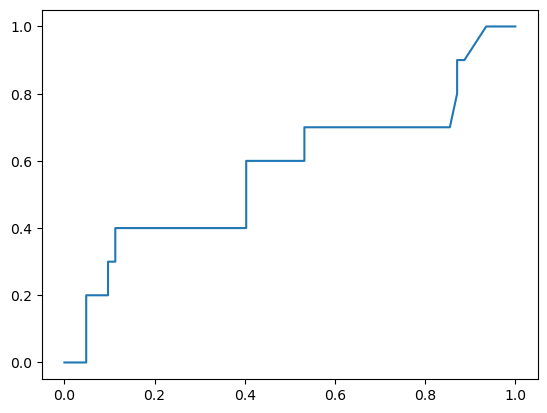

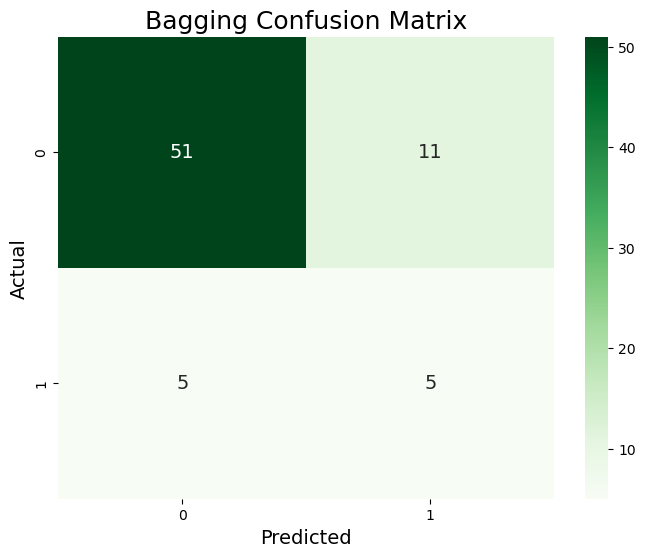

C:\Users\Norynbayev\AppData\Local\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:16:36] WARNING: D:\bld\xgboost-split_1732150467793\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.82
XGBoost Confusion Matrix:
[[55  7]
 [ 6  4]]

XGBoost ROC AUC: 0.65
XGBoost Kolmogorov-Smirnov (KS): 0.37
XGBoost Gini Coefficient: 0.29



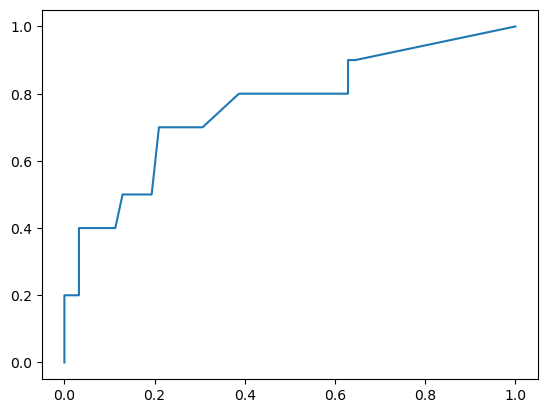

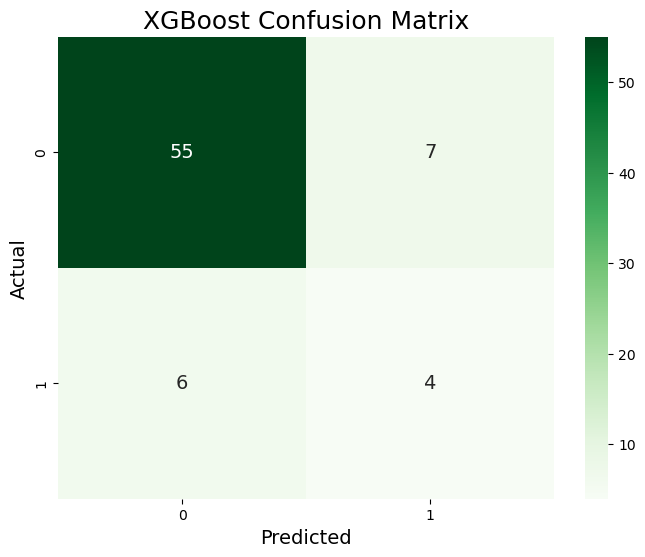

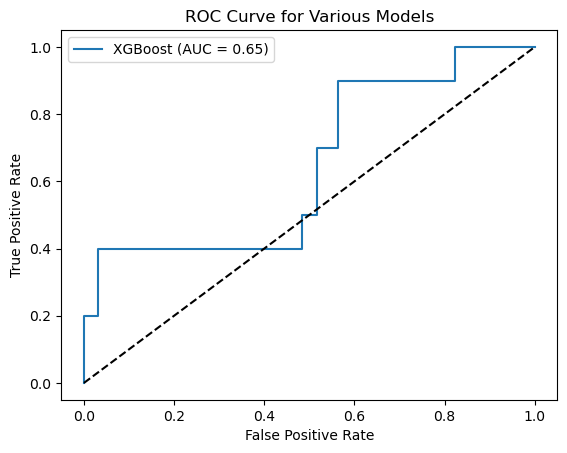

Feature Importances for AdaBoost and Random Forest:


,Random Forest,AdaBoost
Коэффициент чистой прибыли,0.133402,0.24
ROA,0.142248,0.20
ROE,0.158089,0.20
Коэффициент текущей ликвидности,0.139278,0.08
Коэффициент финансовой независимости,0.170307,0.10
Коэффициент маневренности,0.155163,0.10
Коэффициент долг на капитал,0.101513,0.08


Model Performance Metrics:


,Model,Accuracy,ROC AUC,KS Statistic,Gini Coefficient
0,SVM,0.861111,0.551613,0.209677,0.103226
1,Logistic Regression (L2),0.847222,0.566129,0.393548,0.132258
2,Logistic Regression (L1),0.847222,0.582258,0.393548,0.164516
3,Random Forest,0.833333,0.699194,0.409677,0.398387
4,Gradient Boosting,0.819444,0.625806,0.316129,0.251613
5,AdaBoost,0.805556,0.570968,0.287097,0.141935
6,Bagging,0.777778,0.761290,0.490323,0.522581
7,XGBoost,0.819444,0.646774,0.367742,0.293548


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, roc_curve
)
from xgboost import XGBClassifier

# Splitting data into features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=436)

# Models dictionary
models = {
    "SVM": svm.SVC(probability=True),
    "Logistic Regression (L2)": LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000),
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Store feature importances and evaluation metrics
feature_importances = {}
metrics = []

# Loop through models
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions and probabilities
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    ks_stat = max(tpr - fpr)
    gini_coefficient = 2 * auc - 1
    cm = confusion_matrix(y_test, y_pred)
    
    # Print metrics
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"{name} Confusion Matrix:\n{cm}\n")
    print(f"{name} ROC AUC: {auc:.2f}")
    print(f"{name} Kolmogorov-Smirnov (KS): {ks_stat:.2f}")
    print(f"{name} Gini Coefficient: {gini_coefficient:.2f}\n")
    
    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=True, annot_kws={"size": 14})
    plt.title(f"{name} Confusion Matrix", fontsize=18)
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.show()
    
    # Store metrics
    metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "ROC AUC": auc,
        "KS Statistic": ks_stat,
        "Gini Coefficient": gini_coefficient
    })
    
    # Extract feature importances if available
    if hasattr(model, 'feature_importances_'):
        feature_importances[name] = model.feature_importances_
    
    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Plot aggregated ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Various Models')
plt.legend()
plt.show()

# Feature Importance DataFrame
if feature_importances:
    # Select only AdaBoost and Random Forest
    selected_models = ['Random Forest', 'AdaBoost']
    filtered_importances = {k: v for k, v in feature_importances.items() if k in selected_models}
    
    # Convert to DataFrame
    feature_importances_df = pd.DataFrame.from_dict(filtered_importances, orient='index', columns=X.columns)
    feature_importances_df = feature_importances_df.T
    
    print("Feature Importances for AdaBoost and Random Forest:")
    display(feature_importances_df)

if feature_importances:
    selected_models = ['Random Forest', 'AdaBoost']
    filtered_importances = {k: v for k, v in feature_importances.items() if k in selected_models}
    
    # Convert to DataFrame
    feature_importances_df = pd.DataFrame.from_dict(filtered_importances, orient='index', columns=X.columns).T
    feature_importances_df.to_excel("feature_importances.xlsx", index=True)

# Metrics DataFrame
metrics_df = pd.DataFrame(metrics)
print("Model Performance Metrics:")
display(metrics_df)

# Final ScoreCard of df 

In [51]:
pd.set_option('display.max_columns', None)
if df[col].dtype == 'object': 
    df[col] = df[col].str.replace(',', '')
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

KeyError: 'Расходы на финансирование'

In [52]:
df.replace(np.NaN, 0, inplace=True)

In [53]:
target_columns = [
    'engine_id', 'status', 'region_name', 'city_id', 'network', 'class', 'prolongation', 
    'state_id', 'create_date', 'state_name', 'дата фин данных', 'date', 'today', 
    'Коэффициент долговой нагрузки', 'season', 'flat_inner'
]


non_numeric_cols = [col for col in target_columns if col in df.columns]


df[non_numeric_cols] = df[non_numeric_cols].astype('object')


In [54]:
pd.set_option('display.max_columns', None)
if df[col].dtype == 'object':
    df[col] = df[col].str.replace(',', '')
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

KeyError: 'Расходы на финансирование'

In [55]:
df.replace(np.NaN, 0, inplace=True)

In [56]:
# df[non_numeric_cols] = df[non_numeric_cols].astype(str)

In [57]:
cat_cols = ['engine_id', 'status', 'region_name', 'status', 'city_id', 'network', 'class', 'prolongation', 
            'state_id', 'create_date', 'state_name', 'дата фин данных', 'date', 'today', 
            'Коэффициент долговой нагрузки', 'season', 'flat_inner']
X = df.drop(['Target'], axis = 1)
y = df['Target']

In [58]:
from tqdm import tqdm
import optbinning
iv_score_dict = {}
for col in tqdm(X.columns):
  if col in cat_cols:
    optb = optbinning.OptimalBinning(dtype='categorical')
    optb.fit(df[col], df['Target'])
  else:
    optb = optbinning.OptimalBinning(dtype='numerical')
    optb.fit(df[col], df['Target'])
  binning_table = optb.binning_table
  binning_table.build()
  iv_score_dict[col] = binning_table.iv
iv_score_df = pd.Series(iv_score_dict)
iv_score_df.sort_values(ascending=False, inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 15.09it/s]


In [59]:
pd.set_option('display.max_columns', None)

In [60]:
iv_score_df

ROE                                     0.627662
Коэффициент финансовой независимости    0.590031
Коэффициент чистой прибыли              0.371480
Коэффициент маневренности               0.356019
Коэффициент долг на капитал             0.267024
ROA                                     0.257844
Коэффициент текущей ликвидности         0.077881
dtype: float64

In [61]:
iv_score_df2 = pd.DataFrame(iv_score_df, columns=['Numbers']).reset_index()
iv_score_df3 = iv_score_df2[iv_score_df2['Numbers'].between(-1, 1000)]
selected_features = iv_score_df3['index']
selected_features

0                                     ROE
1    Коэффициент финансовой независимости
2              Коэффициент чистой прибыли
3               Коэффициент маневренности
4             Коэффициент долг на капитал
5                                     ROA
6         Коэффициент текущей ликвидности
Name: index, dtype: object

In [62]:
df2 = pd.concat([df[selected_features], df['Target']], axis = 1)
X = df2.drop(['Target'], axis = 1)
y = df2['Target']

In [63]:
from sklearn import linear_model

binning_process = optbinning.BinningProcess(
  variable_names=X.columns.to_list())
# estimator
estimator = linear_model.LogisticRegression()
# scorecard
scorecard = optbinning.Scorecard(
  binning_process=binning_process,
  estimator=estimator,
  scaling_method="min_max",
  scaling_method_params={"min": 300, "max": 850},
# scaling_method = "pdo_odds",
# scaling_method_params = {"pdo": 20, "odds": 50, "scorecard_points": 100},
#intercept_based=True,
#reverse_scorecard=True
)

In [64]:
scorecard.fit(X, y)


Scorecard(binning_process=BinningProcess(variable_names=['ROE',
                                                         'Коэффициент '
                                                         'финансовой '
                                                         'независимости',
                                                         'Коэффициент чистой '
                                                         'прибыли',
                                                         'Коэффициент '
                                                         'маневренности',
                                                         'Коэффициент долг на '
                                                         'капитал',
                                                         'ROA',
                                                         'Коэффициент текущей '
                                                         'ликвидности']),
          estimator=LogisticRegression(), scaling_method='min_max',
          scaling_method_params={'max': 850, 'min': 300})

In [65]:
scorecard.intercept_


0

In [66]:
scorecard_df = scorecard.table(style="detailed")


In [67]:
prediction = scorecard.predict_proba(X)[:, 1]
scorecard_df

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,ROE,0,"(-inf, 0.02)",15,0.073171,12,3,0.200000,-0.301261,0.007347,9.148567e-04,-0.922331,54.155922
1,ROE,1,"[0.02, 0.02)",14,0.068293,13,1,0.071429,0.877394,0.038513,4.665388e-03,-0.922331,109.059847
2,ROE,2,"[0.02, 0.11)",46,0.224390,45,1,0.021739,2.119107,0.484991,5.134048e-02,-0.922331,166.901137
3,ROE,3,"[0.11, 0.17)",22,0.107317,18,4,0.181818,-0.183478,0.003845,4.798970e-04,-0.922331,59.642474
4,ROE,4,"[0.17, 0.90)",88,0.429268,70,18,0.204545,-0.329432,0.052009,6.471929e-03,-0.922331,52.843671
5,ROE,5,"[0.90, inf)",20,0.097561,15,5,0.250000,-0.588943,0.040958,5.047012e-03,-0.922331,40.755161
6,ROE,6,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000e+00,-0.922331,68.189231
7,ROE,7,Missing,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000e+00,-0.922331,68.189231
0,Коэффициент финансовой независимости,0,"(-inf, 0.03)",15,0.073171,7,8,0.533333,-1.821087,0.381586,4.203719e-02,-0.613730,11.742610
1,Коэффициент финансовой независимости,1,"[0.03, 0.07)",14,0.068293,11,3,0.214286,-0.388273,0.011713,1.454960e-03,-0.613730,56.154286


In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Define the base estimator
# Create AdaBoost classifier object
abc = LogisticRegression()

# Train AdaBoost Classifier
model = abc.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8472222222222222


Confusion Matrix:
[[61  1]
 [10  0]]


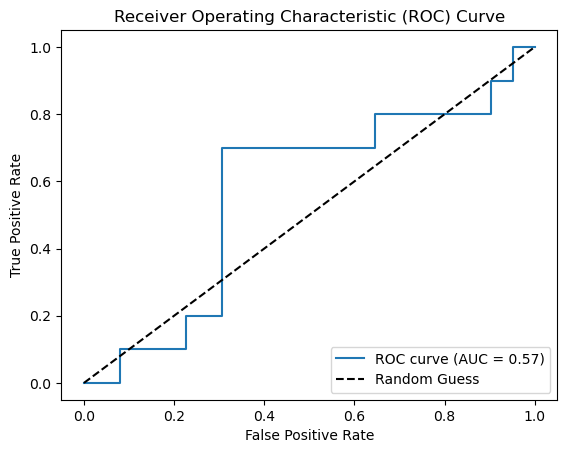

Accuracy: 0.85
ROC AUC Score: 0.57
Gini Coefficient: 0.13
Kolmogorov-Smirnov Statistic: 0.39


In [69]:
# Predict probabilities for ROC, Gini, and KS metrics
probabilities = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute metrics
roc_auc = roc_auc_score(y_test, probabilities)
gini_coefficient = 2 * roc_auc - 1

# Compute Kolmogorov-Smirnov (KS) statistic
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
ks_statistic = max(tpr - fpr)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Display metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Gini Coefficient: {gini_coefficient:.2f}")
print(f"Kolmogorov-Smirnov Statistic: {ks_statistic:.2f}")

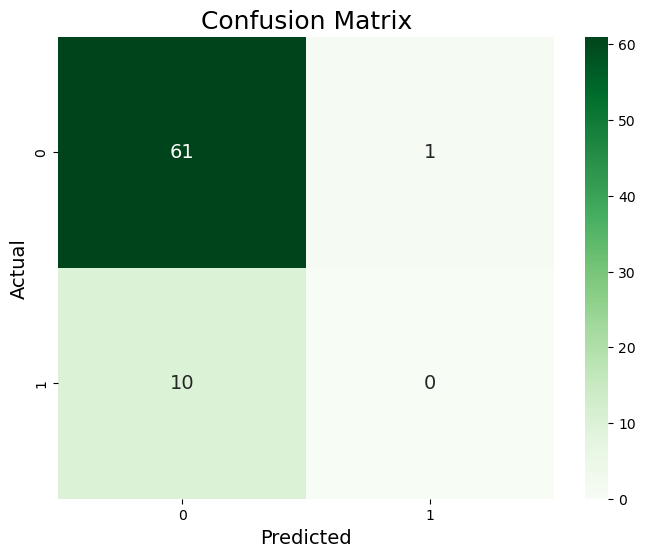

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=True, annot_kws={"size": 14})
plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()
    

In [71]:
X_test

,Коэффициент чистой прибыли,ROA,ROE,Коэффициент текущей ликвидности,Коэффициент финансовой независимости,Коэффициент маневренности,Коэффициент долг на капитал
93,2.122602,0.041571,0.673003,0.934347,0.061769,7.180824e-07,0.524364
153,0.017887,0.003606,0.213819,2.034486,0.016864,6.911368e-06,0.000000
101,-29.316484,-0.020041,-0.049946,4.955989,0.401244,3.466821e-06,0.524364
140,0.016840,0.011133,0.155170,6.302636,0.071745,2.474567e-06,3.424713
98,0.271158,0.228530,0.556670,4.600947,0.410531,1.575039e-05,0.524364
...,...,...,...,...,...,...,...
92,8.044792,0.121344,0.256580,35.286048,0.472926,6.747912e-06,0.027286
111,5.423140,0.074763,0.888420,0.866668,0.084153,1.246437e-06,0.138312
82,545.726560,0.245048,0.898487,1.463617,0.272734,2.048976e-07,1.271609
135,0.082615,0.004955,0.025991,5.707977,0.190661,8.433581e-08,0.573961


In [72]:
X_test['probabilities'] = probabilities

In [73]:
X_test['prediction'] = y_pred
X_test['Target'] = y_test

In [74]:
X_test.to_excel('X_test.xlsx')

In [ ]:
scorecard_df.to_excel('final_scorecard_seven_features.xlsx')

In [ ]:
df = pd.read_excel('data_for_grouping.xlsx')
ik = pd.read_excel('Копия Копия 240807_данные_май_2024 +++ (00000004).xlsx')

In [ ]:
df = df.merge(ik[['Название проекта (база ДТЭМ)', 'Первоначальная стоимость проекта, тенге', 'Застройщик']],
              left_on='cost_official', 
              right_on='Первоначальная стоимость проекта, тенге',
              how='left')


# Updating the 'Название проекта' in df

df['Название проекта'] = df['Название проекта (база ДТЭМ)']

# Dropping unnecessary columns from the merge
df = df.drop(columns=['Название проекта (база ДТЭМ)', 'Первоначальная стоимость проекта, тенге'])

# Ensuring there are no duplicate rows based on the 'Unnamed: 0' column
df = df.drop_duplicates(subset=['Unnamed: 0'])

# Saving the updated DataFrame to an Excel file
df.to_excel('Справочник с data_for_grouping.xlsx', index=False)

In [ ]:
df